# FINAL PROJECT : STEELPROOF MANUFACTURER

## 1. Introduction <a id="section-1"></a>

To optimize production costs, a steel mill called **Steelproof decided to reduce energy consumption at the steel processing stage.** Steel processing takes place inside a metal container with a capacity of about 100 tons. To keep the container strong enough to withstand high temperatures, the inside is lined with firebricks. The molten steel is then poured into the crucible and heated to the desired temperature with a graphite electrode on the lid.

Sulfur must be removed from the metal through a process called desulfurization. The chemical composition of the steel must also be corrected (by adding alloys in bar form from a bunker of bulk material or with the help of a wire feeder), and the necessary samples taken.

Before the alloy is introduced, the temperature of the steel must be measured and its chemical composition analyzed. The temperature is then raised for a few minutes, after which the alloy is added and purged with an inert gas. Then, the new alloy is stirred and the temperature is measured again. **This cycle is continuously repeated until the desired chemical composition and optimum melting temperature are achieved.

The molten steel is then refined or transferred into a casting machine that solidifies the molten steel into slabs.

The following is a summary of the business process of the steel processing stages presented in the flowchart:

In [1]:
from ipywidgets import FileUpload
from IPython.display import display

upload = FileUpload(accept='image/*')
display(upload)

FileUpload(value={}, accept='image/*', description='Upload')

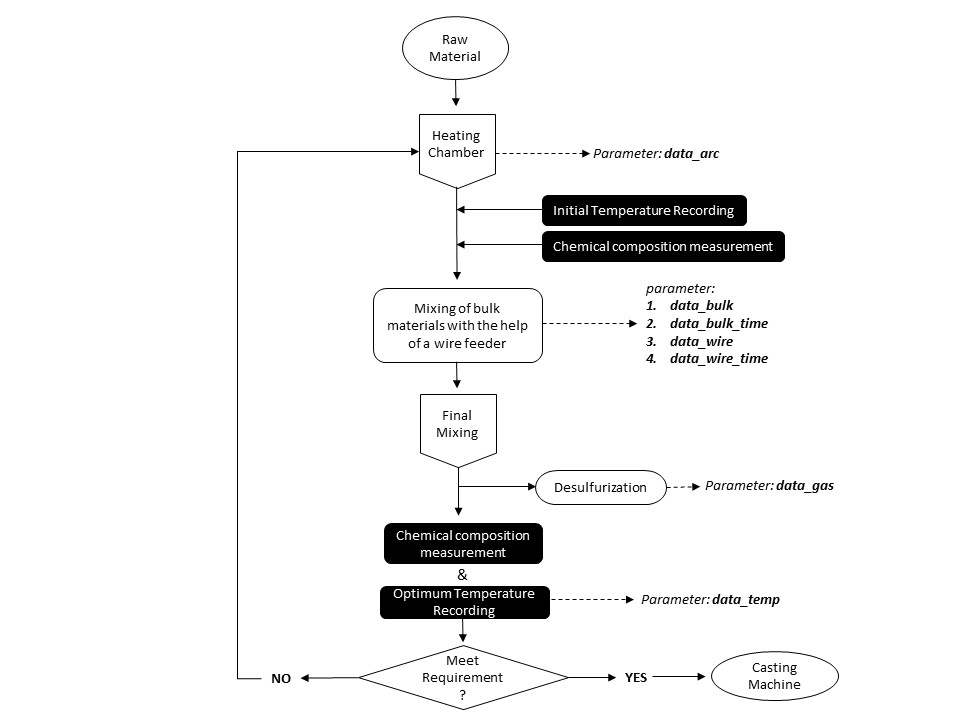

In [2]:
# menampilkan diagram alur
from IPython.display import Image

if upload.value:
    uploaded_image = upload.value[list(upload.value.keys())[0]]['content']
    with open('uploaded_image.jpg', 'wb') as f:
        f.write(uploaded_image)
    # Display the uploaded image
    display(Image(filename='uploaded_image.jpg'))

### 1.1 Goal

The aim of this project is to develop a predictive model capable of predicting metal temperatures using the MAE evaluation matrix. The MAE target is expected to be less than 6.0.

### 1.2 Steps

In order to develop a predictive model, the steel processing parameter data available consisted of several files obtained from different sources:
- data_arc.csv - electrode data
- data_bulk.csv - bulk material supply data (volume)
- data_bulk_time.csv - bulk material delivery data (time)
- data_gas.csv - gas purge data
- data_temp.csv - temperature measurement results
- data_wire.csv - wire material data (volume)
- data_wire_time.csv - wire material data (time)

In each file, there is a "key" column that contains the batch number.
There may be multiple lines with the same key value in the file. These values indicate different processing iterations (cycles).

The general steps to be performed include:
1. Introduction, which contains a description of the project and the objectives of the project.
2. Data preparation, which contains the process of loading the data set.
3. Data cleansing and exploration to clean the dataset, enrich data information, and perform exploratory data analysis.
4. Data pre-processing to prepare the train and test data set.
5. Model training and evaluation.

### 1.3 Overview

[1. Introduction](#section-1)
- Goal
- Steps
- Overview

[2. Data Preparation](#section-2)
- Initialization
- Loading Data set
- Data Overview

[3. Data Cleaning & Exploration](#section-3)

[4. Data Pre-Processing](#section-4)
- Correlation Between Feature and Target
- Categorical Feature Labeling
- Prepare Training Set dan Test Set
- Handling Outlier
- Prepare Feature and Target

[5. Model Training](#section-5)

[6. Model Analysis](#section-6)

[7. General Conclusion](#section-7)
- Exploratory Data
- Model Training and Evaluation

## 2. Data Preparation <a id="section-2"></a>

### 2.1 Initialization

In [3]:
# mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

### 2.2 Loading Data set

In [4]:
# memuat dataset
data_arc = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_arc.csv')
data_bulk = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_bulk.csv')
data_bulk_time = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_bulk_time.csv')
data_gas = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_gas.csv')
data_temp = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_temp.csv')
data_wire = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_wire.csv')
data_wire_time = pd.read_csv('D:\DATA SCIENTIST\PROJECT\PROJECT 17\Data Set Final Steel\data_wire_time.csv')

### 2.3 Data Overview

#### 2.3.1 Data Arc

In [5]:
data_arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


In [6]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [7]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


***
**Findings**

1. Based on the information above, it is known that dataset_arc has 5 columns with 14876 observations, but the column titles still use the `russian` language; therefore, the column titles will be changed to `English` language to make it easier to analyze.
2. Based on the number of non-nulls for each column in this dataset, which is similar to RangeIndex, there might be no missing values in this dataset. To make sure, it will be checked with the **.isna()** method.
3. The lowest value in the reactive power column is `-715.504924`, it will be further checked whether this data is an anomaly and how to solve it.
4. Based on the dataset information, it is known that the maximum value of the key column is 3421, meaning that there are 3421 keys or bets in this dataset.
5. Columns `Начало нагрева дугой` and `Конец нагрева дугой` contain time series data. The analysis of the time series data will be done after the dataset has been cleaned of some issues.

**Missing Value Check**

In [8]:
data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

There are no missing values in the `data_arc` dataset.

**Duplication Check**

In [9]:
data_arc.duplicated().sum()

0

There are no missing duplication in the `data_arc` dataset.

#### 2.3.2 Data Bulk

In [10]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [11]:
data_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [12]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


***
**Findings**

1. Based on the general data information, the data_bulk dataset contains 16 columns with 3129 observations.
2. The data types of this dataset are `integer` and `float`.
3. Based on the general information of the data, there are some missing data in some columns, which will be checked again by **.isna()** method.

**Missing Value Check**

In [13]:
# menampilkan persentase data yang hilang
a = data_bulk.count()
b = data_bulk.fillna(-1).count() 
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] 
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total']
c

,null,not_null,total,percent_null
key,0,3129,3129,0.000000
Bulk 1,2877,252,3129,91.946309
Bulk 2,3107,22,3129,99.296900
Bulk 3,1831,1298,3129,58.517098
Bulk 4,2115,1014,3129,67.593480
Bulk 5,3052,77,3129,97.539150
Bulk 6,2553,576,3129,81.591563
Bulk 7,3104,25,3129,99.201023
Bulk 8,3128,1,3129,99.968041
Bulk 9,3110,19,3129,99.392777


***
Based on the information above, the percentage of missing data tends to be high, close to 100% in some columns such as `bulk 2`, `bulk 7 - bulk 9`. Based on the project description, the `data_bulk` dataset contains information about the bulk mixture that has been used during the process, so the missing values in some columns can be replaced with `0` values because the corresponding key does not use that type of bulk.

**Duplication Check**

In [14]:
data_bulk.duplicated().sum()

0

There is no duplication in the `data_bulk` dataset. Next, data cleaning is done.

#### 2.3.3 Data Bulk Time

In [15]:
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [16]:
data_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [17]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


***
**Findings**

1. Based on the general information of the data, the data_bulk_time dataset contains 16 columns with 3129 observations, similar to the dataset_bulk.
2. The data types of this dataset are `integer` and `object`.
3. Columns `bulk 1 - 15` contain time series information; therefore, these columns will be replaced with data type `date_time` and further time series data analysis will be performed.
3. Based on the general information of the data, there are some missing data in some columns, which will be checked again by the **.isna()** method.

**Missing Values Check**

In [18]:
# menampilkan persentase data yang hilang
a = data_bulk_time.count()
b = data_bulk_time.fillna(-1).count() 
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] 
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total']
c

,null,not_null,total,percent_null
key,0,3129,3129,0.000000
Bulk 1,2877,252,3129,91.946309
Bulk 2,3107,22,3129,99.296900
Bulk 3,1831,1298,3129,58.517098
Bulk 4,2115,1014,3129,67.593480
Bulk 5,3052,77,3129,97.539150
Bulk 6,2553,576,3129,81.591563
Bulk 7,3104,25,3129,99.201023
Bulk 8,3128,1,3129,99.968041
Bulk 9,3110,19,3129,99.392777


***
Based on the information above, the percentage of missing data tends to be high, close to 100% in some columns such as `bulk 2`, `bulk 7 - bulk 9`, a similar finding with the `data_bulk` dataset so that the missing values in some columns can be replaced with `0` values.

**Duplication Check**

In [19]:
data_bulk_time.duplicated().sum()

0

There are no duplication on the `data_bulk_time` dataset.

#### 2.3.4 Data Gas

In [20]:
data_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [21]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [22]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


***
**Findings**

1. Based on the general information of the data, the data_bulk_time dataset contains 2 columns with 3239 observations, but the column titles are still using `russian` language; therefore, the column titles will be changed to `English` language to make it easier to analyze.
2. Based on the number of non-nulls for each column in this dataset, which is similar to RangeIndex, there might be no missing values in this dataset. To make sure, it will be checked with **.isna()** method.
3. The lowest value in column `gas 1` is `0`, it will be further checked whether this data is an anomaly and how to solve it.

**Missing Value Check**

In [23]:
# menampilkan persentase data yang hilang
data_gas.isna().sum()

key      0
Газ 1    0
dtype: int64

There are no missing values on the `data_gas` dataset.

**Duplication Check**

In [24]:
data_gas.duplicated().sum()

0

There are no duplication on the `data_gas` dataset.

#### 2.3.5 Data Temp

In [25]:
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [26]:
data_temp.describe()

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [27]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


***
**Findings**

1. Based on the general information of the data, the data_temp dataset contains 3 columns with 15907 observations, but the column titles are still using `russian` language; therefore, the column titles will be changed to `English` language to make it easier to analyze.
2. The column `Время замера` contains time series information; therefore, this column will be changed to the data type `date_time` and then analyzed at the EDA stage.
3. Based on the sample data, the `Время замера` column contains time series information; therefore, this column will be replaced with the `date_time` data type.
4. Based on the general data information, there is some missing data in `Температура` column, which will be checked again by the **.isna()** method.

**Missing Value Check**

In [28]:
# menampilkan persentase data yang hilang
a = data_temp.count()
b = data_temp.fillna(-1).count() 
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] 
c = c[['null', 'not_null', 'total']]
c['percent_null'] = round(c['null']*100 / c['total'], 2)
c

,null,not_null,total,percent_null
key,0,15907,15907,0.00
Время замера,0,15907,15907,0.00
Температура,2901,13006,15907,18.24


There are `2901` or as much as `18.24%` missing values in the `Температура` column, a considerable percentage of which may be due to failed measurements, which will be further examined in the data cleansing stage.

**Duplication Check**

In [29]:
data_temp.duplicated().sum()

0

There is no duplication in the `data_temp` dataset.

#### 2.3.6 Data Wire

In [30]:
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [32]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


***
**Findings**

1. Based on the general data information, the data_bulk dataset contains 10 columns with 3081 observations.
2. The data types of this dataset are `integer` and `float`.
3. Based on the general information of the data, there are some missing data in some columns, which will be checked again by **.isna()** method.

**Missing Value Check**

In [33]:
# menampilkan persentase data yang hilang
a = data_wire.count()
b = data_wire.fillna(-1).count()
c = pd.concat([a,b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null']
c = c[['null', 'not_null', 'total']]
c['percent_null'] = round(c['null']*100 / c['total'], 2)
c

,null,not_null,total,percent_null
key,0,3081,3081,0.00
Wire 1,26,3055,3081,0.84
Wire 2,2002,1079,3081,64.98
Wire 3,3018,63,3081,97.96
Wire 4,3067,14,3081,99.55
Wire 5,3080,1,3081,99.97
Wire 6,3008,73,3081,97.63
Wire 7,3070,11,3081,99.64
Wire 8,3062,19,3081,99.38
Wire 9,3052,29,3081,99.06


***
Based on the information above, the percentage of missing data tends to be high, close to 100% in some columns, such as `wire 4 - wire 9`. Based on the project description, the `data_wire` dataset contains information on the wire feeders that have been used during the process, so the missing values in some columns can be replaced with `0` values because the corresponding key does not use that type of wire feeder.

**Duplication Check**

In [34]:
data_wire.duplicated().sum()

0

There are no duplication on the `data_wire` dataset.

#### 2.3.7 Data Wire Time

In [35]:
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data_wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [37]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


***
**Findings**

1. Based on the general information of the data, the data_bulk_time dataset contains 10 columns with 3081 observations, similar to the dataset_bulk.
2. The data types of this dataset are `integer` and `object`.
3. Columns `wire 1 - wire 9` contain time data information; therefore, these columns will be changed to the data type `date_time` and further time series data analysis will be performed.
3. Based on the general data information, if there is some missing data in some columns, it will be checked again by the **.isna()** method.

**Missing Value Check**

In [38]:
# menampilkan persentase data yang hilang
a = data_wire_time.count()
b = data_wire_time.fillna(-1).count()
c = pd.concat([a,b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null']
c = c[['null', 'not_null', 'total']]
c['percent_null'] = round(c['null']*100 / c['total'], 2)
c

,null,not_null,total,percent_null
key,0,3081,3081,0.00
Wire 1,26,3055,3081,0.84
Wire 2,2002,1079,3081,64.98
Wire 3,3018,63,3081,97.96
Wire 4,3067,14,3081,99.55
Wire 5,3080,1,3081,99.97
Wire 6,3008,73,3081,97.63
Wire 7,3070,11,3081,99.64
Wire 8,3062,19,3081,99.38
Wire 9,3052,29,3081,99.06


***
Based on the information above, the percentage of missing data tends to be high, close to 100% in some columns such as `wire 4 - wire 9`, a similar finding with the `data_wire` dataset, so that the missing values in some columns can be replaced with `0` values.

**Duplication Check**

In [39]:
data_wire_time.duplicated().sum()

0

There is no data duplication in the `data_wire_time` dataset.

## 3. Data Cleaning and Exploration <a id="section-3"></a>

At this stage, the quality of the datasets will be improved and enriched with new information, and feature engineering will be performed for some datasets.

### 3.1 data_arc

**Fixing Column Title**

In [40]:
# mengganti judul kolom
data_arc.columns = ['key', 'starting_arc_heating', 'end_arc_heating', 'active_power', 'reactive_power']

In [41]:
data_arc

,key,starting_arc_heating,end_arc_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


In [42]:
# menampilkan anomali data pada kolom reactive_power
data_reactive_power_zero = data_arc[data_arc['reactive_power'] < 0]
data_reactive_power_zero

,key,starting_arc_heating,end_arc_heating,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


There is 1 data observation with reactive power below `0`, occurring at key `2116`. The reactive power of each cycle at key `2116` will be displayed again.

In [43]:
# menampilkan informasi key 2116
key_2116 = data_arc[data_arc['key'] == 2116]
key_2116

,key,starting_arc_heating,end_arc_heating,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


Based on the data display above, there may be a reactive power record error, this number will be replaced with the reactive power value from the 2nd cycle.

In [44]:
# mengganti reactive power siklus ke-3 pada key 2116 dengan nilai sebelumnya / nilai silus ke-2
index_to_replace = 9780
column_to_replace = 'reactive_power'

data_arc.at[index_to_replace, column_to_replace] = data_arc.at[index_to_replace - 1, column_to_replace]

In [45]:
# menyediakan informasi total active power dan reactive power yang dihabiskan masing-masing key
data_arc_power = data_arc.groupby('key')[['active_power', 'reactive_power']].sum()
data_arc_power

,active_power,reactive_power
key,,
1,4.878147,3.183241
2,3.052598,1.998112
3,2.525882,1.599076
4,3.209250,2.060298
5,3.347173,2.252643
...,...,...
3237,3.932467,2.828459
3238,2.106529,1.681182
3239,4.666754,3.111617


Text(0.5, 1.0, 'Data Distribution Power Consumption')

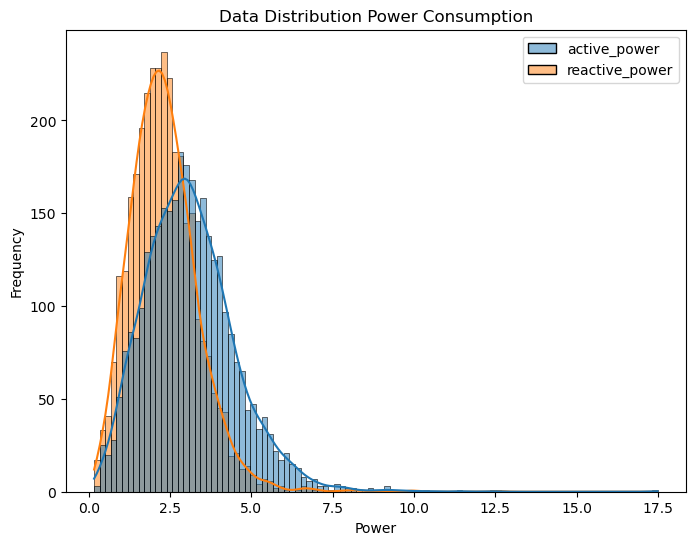

In [46]:
# menampilkan distribusi power consumption
plt.figure(figsize=(8, 6))
sns.histplot(data_arc_power, kde=True)
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Data Distribution Power Consumption")

***
**Insight**

Based on the distribution graph above, it is known that generally the energy spent for the preheating process of each batch is around `2.5`, although there are some batches with considerable energy consumption. This is likely due to the need for more iteration processes to reach the limit of steel chemical composition requirements.

Next, we will see the correlation between `active_power` and `reactive_poer`. 

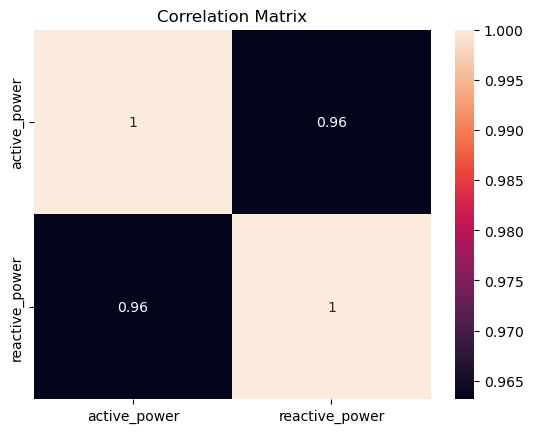

In [47]:
# menampilkan korelasi active_power dan reactive_power
correlation_matrix = data_arc[['active_power', 'reactive_power']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

The correlation score between `active_power` and `reactive_power` is 0.96, meaning that there is a very significant directly proportional relationship between these two features, which means that the higher the active_power value, the higher the reactive power value.

**Change data type `starting_arc_heating` and `end_arc_heating` to `datetime`.**

In [48]:
# mengubah tipe data menjadi datetime
data_arc['starting_arc_heating'] = pd.to_datetime(data_arc['starting_arc_heating'])
data_arc['end_arc_heating'] = pd.to_datetime(data_arc['end_arc_heating'])

Next, a sample graph of the changes in active_power and reactive_power as the iteration process progresses at keys `1` - `3` will be shown.

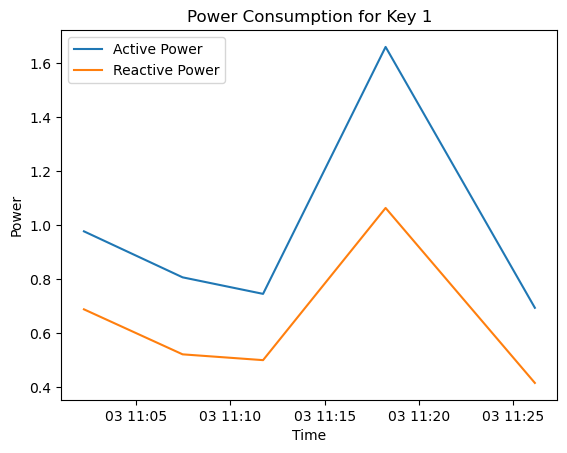

In [49]:
# menampilkan grafik perubahan active_power dan reactive_power seiring berjalannya waktu proses iterasi key 1
data_key_1 = data_arc[data_arc['key'] == 1]

plt.plot(data_key_1['starting_arc_heating'], data_key_1['active_power'], label='Active Power')
plt.plot(data_key_1['starting_arc_heating'], data_key_1['reactive_power'], label='Reactive Power')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Consumption for Key 1')
plt.legend()
plt.show()

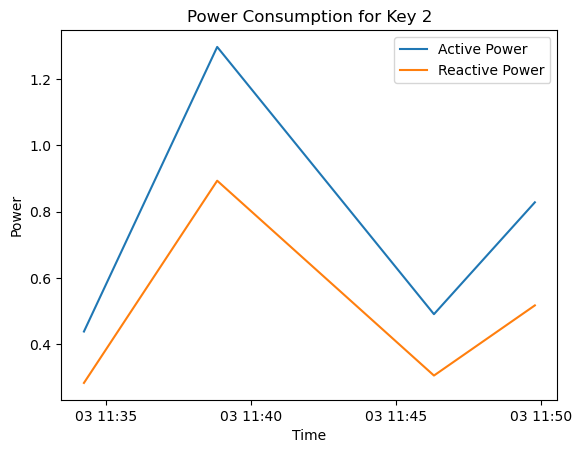

In [50]:
# menampilkan grafik perubahan active_power dan reactive_power seiring berjalannya waktu proses iterasi key 2
data_key_2 = data_arc[data_arc['key'] == 2]

plt.plot(data_key_2['starting_arc_heating'], data_key_2['active_power'], label='Active Power')
plt.plot(data_key_2['starting_arc_heating'], data_key_2['reactive_power'], label='Reactive Power')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Consumption for Key 2')
plt.legend()
plt.show()

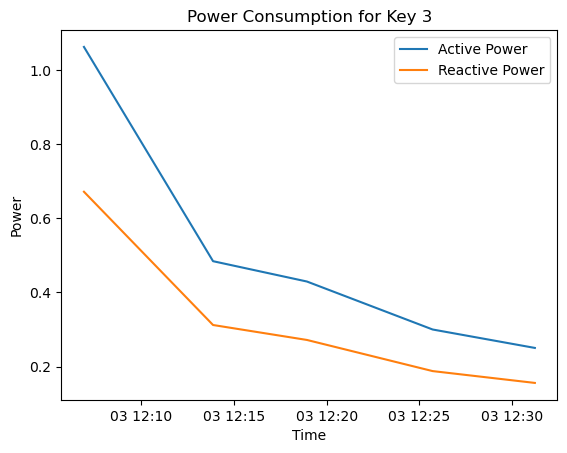

In [51]:
# menampilkan grafik perubahan active_power dan reactive_power seiring berjalannya waktu proses iterasi key 3
data_key_3 = data_arc[data_arc['key'] == 3]

plt.plot(data_key_3['starting_arc_heating'], data_key_3['active_power'], label='Active Power')
plt.plot(data_key_3['starting_arc_heating'], data_key_3['reactive_power'], label='Reactive Power')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Consumption for Key 3')
plt.legend()
plt.show()

***
**Findings**

Based on the power consumption over time series graph, it is known that the amount of power consumption is not always related to time, as in the key `1` graph, the increase in power consumption is seen to increase in the 4th iteration and decreases again in the last iteration. The opposite happens in key `3` where the power consumption decreases as the iteration process progresses.

**Feature Engineering**

*1. Heating Duration*

In [52]:
# menambah informasi heating duration
data_arc['heating_duration'] = data_arc['end_arc_heating'] - data_arc['starting_arc_heating'] 
data_arc['duration_hours'] = round(data_arc['heating_duration'].dt.total_seconds() / 3600, 3)

*2. Energy Consumption*

According to Meier[1](#section-8), in his book entitled "Electric Power Systems: A Conceptual Introduction" and online resource[2](#section-9), it is said that energy consumption can be calculated by multiplying power (`active_power`) by time (`duration in hours`). We will calculate the heating duration for each cycle.

$$
E = P x t
$$

where :
 - E is energy.
 - P is power in watts.
 - t is time / duration in hour / hour

In [53]:
# menambah informasi energy consumption
data_arc['energy_consumption'] = data_arc['active_power']*data_arc['duration_hours']
data_arc

,key,starting_arc_heating,end_arc_heating,active_power,reactive_power,heating_duration,duration_hours,energy_consumption
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,0 days 00:03:48,0.063,0.061492
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0 days 00:03:05,0.051,0.041086
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0 days 00:02:52,0.048,0.035729
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,0 days 00:06:05,0.101,0.167596
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0 days 00:02:28,0.041,0.028403
...,...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0 days 00:02:37,0.044,0.023481
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0 days 00:03:00,0.050,0.033830
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0 days 00:03:04,0.051,0.037429
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0 days 00:00:57,0.016,0.003531


*3. Active to Reactive Power Ratio*

In [54]:
# menambah informasi power_ratio
data_arc['power_ratio'] = data_arc['active_power'] / data_arc['reactive_power']
data_arc

,key,starting_arc_heating,end_arc_heating,active_power,reactive_power,heating_duration,duration_hours,energy_consumption,power_ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,0 days 00:03:48,0.063,0.061492,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0 days 00:03:05,0.051,0.041086,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0 days 00:02:52,0.048,0.035729,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,0 days 00:06:05,0.101,0.167596,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0 days 00:02:28,0.041,0.028403,1.671717
...,...,...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0 days 00:02:37,0.044,0.023481,1.505675
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0 days 00:03:00,0.050,0.033830,1.292139
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0 days 00:03:04,0.051,0.037429,1.542928
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0 days 00:00:57,0.016,0.003531,1.514004


Next, we will combine the information of each iteration in the data_arc dataset into observations for each key or bet with the help of the **.groupby()** method and the aggregation of **.sum()**.

In [55]:
# membuat variabel new_data_arc yang memuat total konsumsi power dan durasi
new_data_arc = data_arc.groupby('key')[['active_power', 'reactive_power', 'duration_hours', 'energy_consumption', 'power_ratio']].sum()

# menambah informasi jumlah iterasi/silus tiap key
new_data_arc['iteration_count'] = data_arc['key'].value_counts()
new_data_arc

,active_power,reactive_power,duration_hours,energy_consumption,power_ratio,iteration_count
key,,,,,,
1,4.878147,3.183241,0.304,0.334306,7.694490,5
2,3.052598,1.998112,0.225,0.203682,6.207336,4
3,2.525882,1.599076,0.181,0.122989,7.915599,5
4,3.209250,2.060298,0.207,0.186942,6.253946,4
5,3.347173,2.252643,0.242,0.277139,5.921711,4
...,...,...,...,...,...,...
3237,3.932467,2.828459,0.252,0.215558,6.921013,5
3238,2.106529,1.681182,0.152,0.120534,3.773382,3
3239,4.666754,3.111617,0.339,0.235530,11.983343,8


Text(0.5, 1.0, 'Data Distribution Heating Duration')

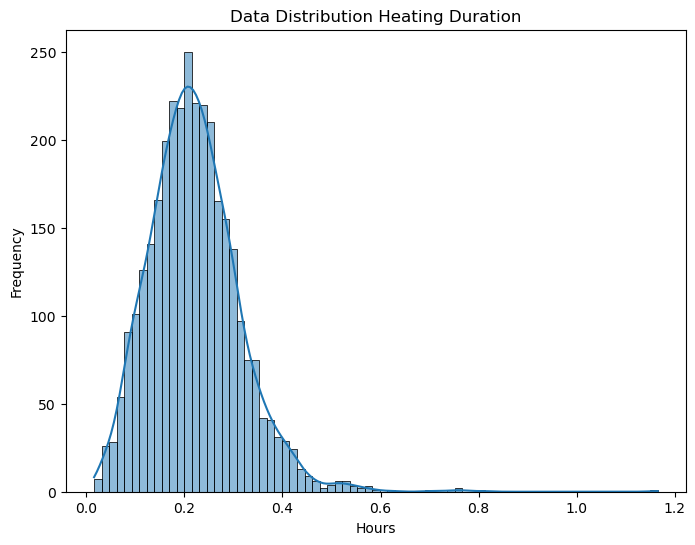

In [56]:
# menampilkan distribusi data durasi
plt.figure(figsize=(8, 6))
sns.histplot(new_data_arc['duration_hours'], kde=True)
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Data Distribution Heating Duration")

***
Based on the graph above, it can be seen that generally, the warm-up duration of 1 key is around `0.25 hours`, although there are some keys with a long warm-up duration, reaching `1 hours'.

Text(0.5, 1.0, 'Data Distribution Heating Cycle')

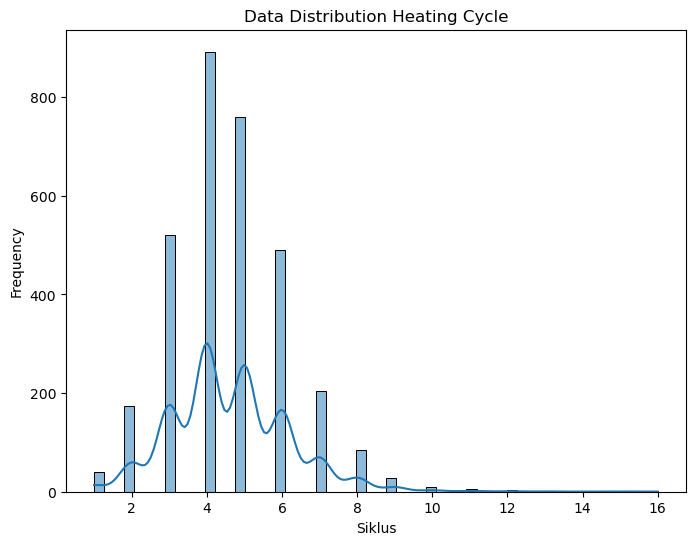

In [100]:
# menampilkan distribusi siklus pengolahan baja
plt.figure(figsize=(8, 6))
sns.histplot(new_data_arc['iteration_count'], kde=True)
plt.xlabel("Siklus")
plt.ylabel("Frequency")
plt.title("Data Distribution Heating Cycle")

***
Based on the above graph, it was found that generally, the number of process cycles or iterations to obtain the optimum steel chemical composition and temperature is `4 iterations`.

Text(0.5, 1.0, 'Data Distribution Energy Consumption')

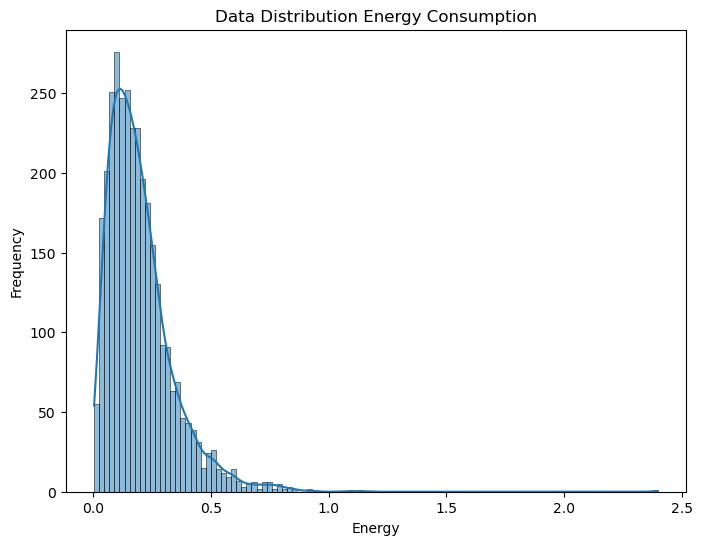

In [165]:
# menampilkan distribusi energy consumption
plt.figure(figsize=(8, 6))
sns.histplot(new_data_arc['energy_consumption'], kde=True)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title("Data Distribution Energy Consumption")

***
Based on the above graph, generally, the energy spent for the heating process of 1 key is `0.25` and it is also seen that the energy consumption is quite large above `1.0`. This can be reduced by reducing the heating time. A boxplot graph will be shown to show the outliers in this column.

**Handling Outlier in the `active_power` column**

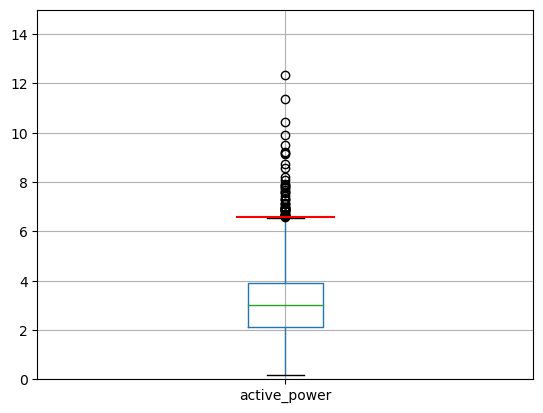

In [102]:
# menampilkan grgafik boxplot dengan whisker teoritis bagian atas
Q1 = new_data_arc['active_power'].quantile(0.25)
Q3 = new_data_arc['active_power'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 15)
new_data_arc.boxplot('active_power')
plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* of the displayed boxplot; the upper theoretical whisker will guide the upper limit of *outliers* in this column and will be removed from the train dataset.

**Handling Outlier in the `duration_hours` column**

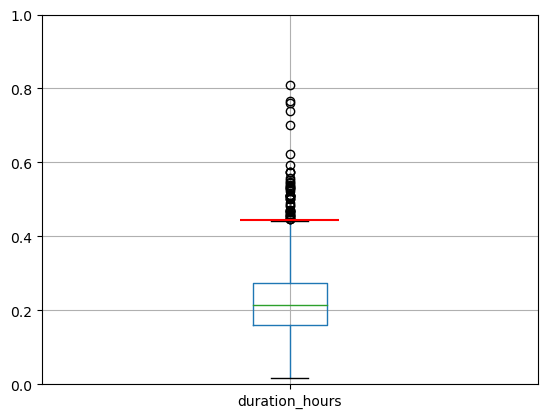

In [103]:
# menampilkan grgafik boxplot dengan whisker teoritis bagian atas
Q1 = new_data_arc['duration_hours'].quantile(0.25)
Q3 = new_data_arc['duration_hours'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 1)
new_data_arc.boxplot('duration_hours')
plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* of the displayed boxplot; the upper theoretical whisker will guide the upper limit of *outliers* in this column and will be removed from the train dataset.

### 3.2 data_bulk

**Fix Missing Values**

In [61]:
# mengisi nilai yang hilang dengan 0
data_bulk = data_bulk.fillna(0)

In [62]:
# menampilkan jumlah nilai yang hilang
data_bulk.isna().sum()

key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

The missing values are above. Next step is calculate the total bulk usage by adding the `total_bulk` column.

In [63]:
# menghitung total penggunaan bulk tiap key
column_to_sum = list(range(1, 16))

data_bulk['total_bulk'] = 0

for column_index in column_to_sum:
    data_bulk['total_bulk'] += data_bulk.iloc[:, column_index]

data_bulk

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,total_bulk
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0,758.0
3125,3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0,594.0
3126,3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0,630.0
3127,3240,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,54.0,272.0


Text(0.5, 1.0, 'Data Distribution Bulk Consumption')

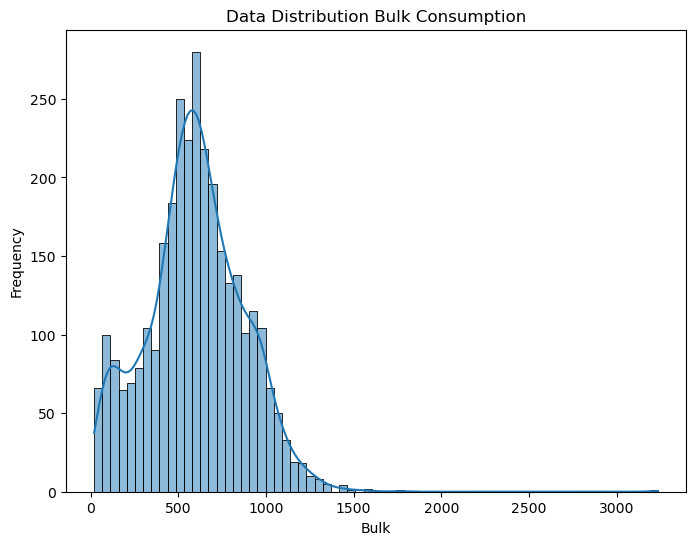

In [64]:
# menampilkan distribusi bulk consumption
plt.figure(figsize=(8, 6))
sns.histplot(data_bulk['total_bulk'], kde=True)
plt.xlabel("Bulk")
plt.ylabel("Frequency")
plt.title("Data Distribution Bulk Consumption")

Based on the distribution graph above, it is known that the consumption of the raw mix generally consumes `700` volumes of mix to obtain the required chemical composition. It can also be seen that some data distributions above `1500`, will be checked for outliers. The missing values are above. Next, calculate the total bulk usage by adding the `total_bulk` column.

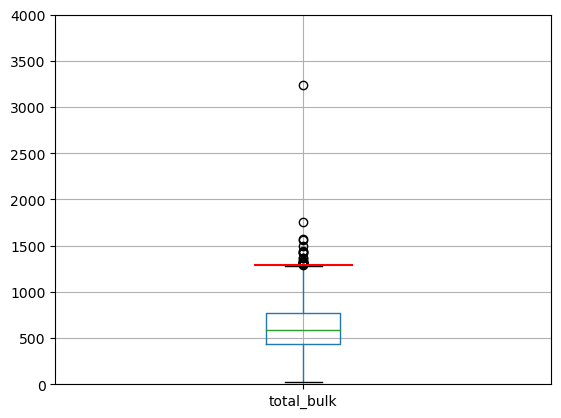

In [65]:
# menampilkan grgafik boxplot dengan whisker teoritis bagian atas
Q1 = data_bulk['total_bulk'].quantile(0.25)
Q3 = data_bulk['total_bulk'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 4000)
data_bulk.boxplot('total_bulk')
plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* of the displayed boxplot; the upper theoretical whisker will guide the upper limit of *outliers* in this column and will be removed from the train dataset.

In [66]:
# membuat variabel new_data_bulk
new_data_bulk = data_bulk[['key', 'total_bulk']]
new_data_bulk.describe()

,key,total_bulk
count,3129.000000,3129.000000
mean,1624.383509,595.503356
std,933.337642,276.557794
min,1.000000,19.000000
25%,816.000000,429.000000
50%,1622.000000,591.000000
75%,2431.000000,772.000000
max,3241.000000,3235.000000


Based on the descriptive statistics of the data, it is known that the range of minimum and maximum values of `total_bulk` is quite far, namely from the range of `19 - 3235`, therefore binning will be done to create category features.

In [67]:
# melakukan binning berdasarkan pendekatan kuartil
bins = [0, 400, 600, 800, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High'] 

# membuat fitur baru 'total_bulk_category'
new_data_bulk.loc[:, 'total_bulk_category'] = pd.cut(new_data_bulk['total_bulk'], bins=bins, labels=labels, include_lowest=True)
new_data_bulk

C:\Users\KOMPUTER\AppData\Local\Temp\ipykernel_10464\27599087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_bulk.loc[:, 'total_bulk_category'] = pd.cut(new_data_bulk['total_bulk'], bins=bins, labels=labels, include_lowest=True)


,key,total_bulk,total_bulk_category
0,1,553.0,Medium
1,2,582.0,Medium
2,3,544.0,Medium
3,4,595.0,Medium
4,5,584.0,Medium
...,...,...,...
3124,3237,758.0,High
3125,3238,594.0,Medium
3126,3239,630.0,High
3127,3240,272.0,Low


### 3.3 data_bulk_time

**Change `bulk` column to `datetime`.**

In [68]:
# mengubah tipe data menjadi datetime
for column in data_bulk_time.columns:
    if 'Bulk' in column:
        data_bulk_time[column] = pd.to_datetime(data_bulk_time[column], errors='coerce')
data_bulk_time

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaT,NaT,2019-08-31 22:51:28,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-08-31 22:46:52,NaT,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,NaT,NaT,2019-08-31 23:39:11,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-08-31 23:33:09,NaT,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,NaT,NaT,NaT,NaT,NaT,2019-09-01 01:51:58,NaT,NaT,NaT,NaT,NaT,2019-09-01 01:39:41,NaT,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaT,NaT,NaT,NaT,NaT,2019-09-01 03:12:40,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-01 02:41:27,2019-09-01 02:41:27


C:\Users\KOMPUTER\AppData\Local\Temp\ipykernel_10464\1635238389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['duration'] = sample_data.iloc[:, 1:].max(axis=1) - sample_data.iloc[:, 1:].min(axis=1)


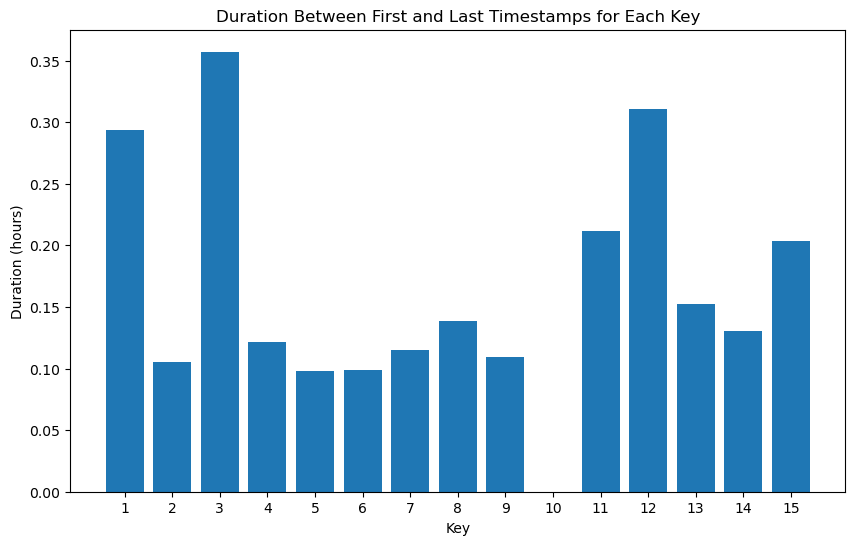

In [69]:
# mengambil sampel data 15 key
sample_data = data_bulk_time[data_bulk_time['key'] <= 15]

# menghitung durasi setiap key
sample_data['duration'] = sample_data.iloc[:, 1:].max(axis=1) - sample_data.iloc[:, 1:].min(axis=1)

# menampilkan grafik time series
plt.figure(figsize=(10, 6))
plt.bar(sample_data['key'], sample_data['duration'].dt.total_seconds() / 3600)
plt.xlabel('Key')
plt.ylabel('Duration (hours)')
plt.title('Duration Between First and Last Timestamps for Each Key')
plt.xticks(sample_data['key'])
plt.show()

***
Based on the sample data and graph above, it is known that the duration of bulk usage is different for each key or bet. For the first 15 keys, key `3` requires the longest mixing time between bulk, which is `0.35 hours`, but there is something unique in key `10` where there is no peak at all. This tells us that each key requires a different bulk mixing time (there is no visible trend in the graph), and the absence of a peak at key `10` indicates that the mixing of multiple `bulk`s is done at the same time.

### 3.4 data_gas

**Fix Column Title**

In [70]:
# mengganti judul kolom
data_gas.columns = ['key', 'gas_1']
data_gas

,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


Text(0.5, 1.0, 'Data Distribution Gas Cleaning')

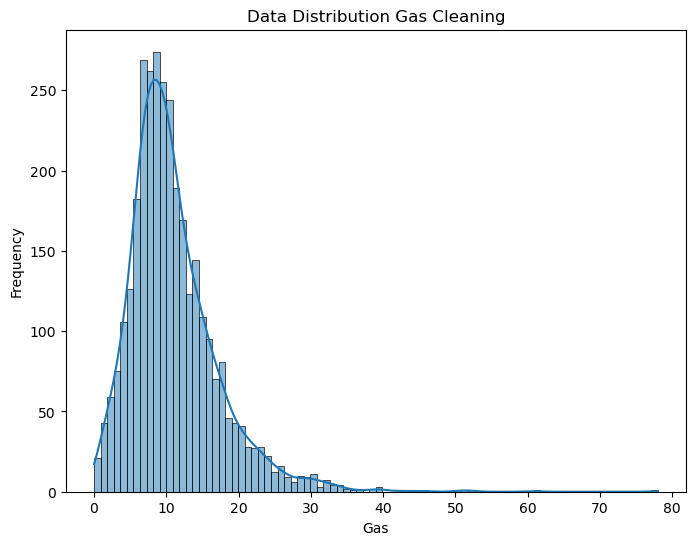

In [71]:
# menampilkan distribusi bulk consumption
plt.figure(figsize=(8, 6))
sns.histplot(data_gas['gas_1'], kde=True)
plt.xlabel("Gas")
plt.ylabel("Frequency")
plt.title("Data Distribution Gas Cleaning")

***
Based on the distribution graph above, it is known that the amount of desulfurized gas is `10`. Based on the business process, this parameter does not directly affect the steel temperature measurement results, but the correlation will be confirmed again.

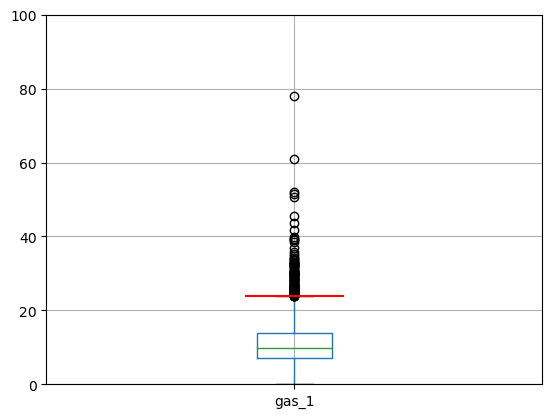

In [72]:
# menampilkan grafik boxplot dengan whisker teoritis bagian atas
Q1 = data_gas['gas_1'].quantile(0.25)
Q3 = data_gas['gas_1'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 100)
data_gas.boxplot('gas_1')
plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* of the displayed boxplot; the upper theoretical whisker will guide the upper limit of *outliers* in this column and will be removed from the train dataset.

### 3.5 data_temp

**Fix Column Title**

In [73]:
# mengganti judul kolom
data_temp.columns = ['key', 'measurement_time', 'temperature']
data_temp.head(20)

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


**Fix Missing Values**

In [74]:
# memeriksa kembali nilai yang hilang
data_temp[data_temp['temperature']!=data_temp['temperature']]

,key,measurement_time,temperature
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
...,...,...,...
15901,3240,2019-09-01 03:35:16,NaN
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


Based on the information above, it is suspected that the missing values occur between the keys `2500 - 3241`. We will check in more detail whether the missing values occur in all iterations or not.

In [75]:
# menampilkan jumlah key yang terdapat nilai yang hilang
nan_key = data_temp[data_temp['temperature']!=data_temp['temperature']]['key'].unique()
print('Jumlah key dengan nilai yang hilang', nan_key.size)

Jumlah key dengan nilai yang hilang 739


In [76]:
# menampilkan sampel data batch dengan nilai yang hilang
data_temp_nan = data_temp[(data_temp['key']<=3241) & (data_temp['key']>=2500)]
data_temp_nan.head(20)

,key,measurement_time,temperature
12267,2500,2019-08-06 03:11:31,1539.0
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12271,2501,2019-08-06 03:44:42,1587.0
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
12274,2501,2019-08-06 04:22:14,NaN
12275,2501,2019-08-06 04:31:14,NaN
12276,2502,2019-08-06 04:45:26,1583.0


In [77]:
# menampilkan jumlah iterasi tanpa nilai nan pada key 2500 - 3241
data_temp_non_null_count = data_temp_nan.pivot_table(index=data_temp_nan['key'], values='temperature', aggfunc=('count'))
data_temp_non_null_count

,temperature
key,
2500,1
2501,1
2502,1
2503,1
2504,1
...,...
3237,1
3238,1
3239,1


*** 
Based on the sample data above, it is known that generally missing values occur in the 2nd iteration onwards; this is likely due to temperature measurement failure in the next iteration. Therefore, 739 keys with missing values will be dropped from the `data_temp` dataset.

In [78]:
# menyeleksi data_temp dari ke 2500 - 3241
data_temp2 = data_temp[data_temp['key'] < 2500]
data_temp2.head(15)

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [79]:
data_temp2.describe()

,key,temperature
count,12267.000000,12267.000000
mean,1235.589060,1591.999022
std,729.452481,20.833175
min,1.000000,1191.000000
25%,602.000000,1581.000000
50%,1238.000000,1591.000000
75%,1874.000000,1601.000000
max,2499.000000,1705.000000


**Change `measurement_time` to `datetime`.**

In [80]:
# mengubah tipe data kolom `measurement_time` menjadi datatime
data_temp2['measurement_time'] = pd.to_datetime(data_temp2['measurement_time'])

C:\Users\KOMPUTER\AppData\Local\Temp\ipykernel_10464\632534075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp2['measurement_time'] = pd.to_datetime(data_temp2['measurement_time'])


In [81]:
# menampilkan durasi pengukuran temperatur pertama hingga terakhir
group_time = data_temp2.groupby('key').agg({'measurement_time': ['min', 'max']})
group_time.columns = group_time.columns.droplevel()
group_time['duration'] = group_time['max'] - group_time['min']
group_time['duration_minutes'] = round(group_time['duration'].dt.total_seconds() / 60, 2)
group_time

,min,max,duration,duration_minutes
key,,,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39,0 days 00:14:21,14.35
2,2019-05-03 11:37:27,2019-05-03 11:59:12,0 days 00:21:45,21.75
3,2019-05-03 12:13:17,2019-05-03 12:34:57,0 days 00:21:40,21.67
4,2019-05-03 12:52:57,2019-05-03 12:59:25,0 days 00:06:28,6.47
5,2019-05-03 13:23:19,2019-05-03 13:36:01,0 days 00:12:42,12.70
...,...,...,...,...
2495,2019-08-06 00:35:45,2019-08-06 00:54:42,0 days 00:18:57,18.95
2496,2019-08-06 01:02:54,2019-08-06 01:29:52,0 days 00:26:58,26.97
2497,2019-08-06 01:41:53,2019-08-06 01:53:50,0 days 00:11:57,11.95


In [82]:
# menampilkan statisktika deskriptif dataset group_time
group_time.describe()

,duration,duration_minutes
count,2477,2477.000000
mean,0 days 00:30:53.456197012,30.890941
std,0 days 00:21:41.783213493,21.696447
min,0 days 00:00:00,0.000000
25%,0 days 00:19:41,19.680000
50%,0 days 00:26:31,26.520000
75%,0 days 00:37:42,37.700000
max,0 days 06:32:17,392.280000


Text(0.5, 1.0, 'Data Distribution Temperature Recordings')

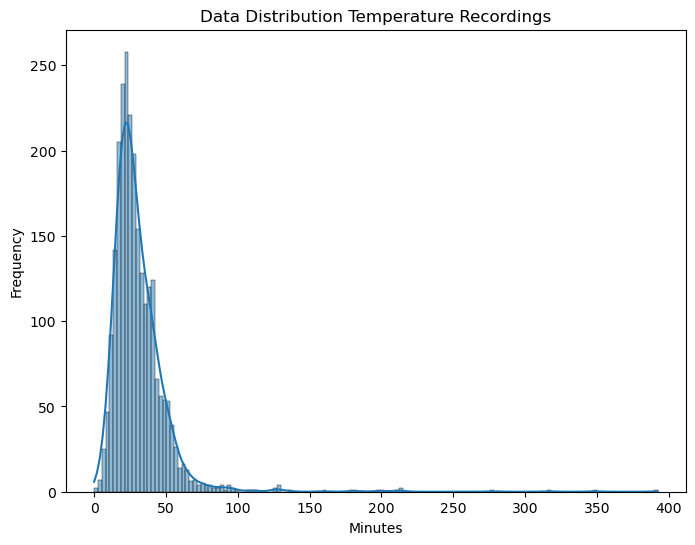

In [83]:
# menampilkan distribusi data durasi
plt.figure(figsize=(8, 6))
sns.histplot(group_time['duration_minutes'], kde=True)
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.title("Data Distribution Temperature Recordings")

***
Based on the descriptive statistics and graphs above, it can be seen that the first and last cycle temperature measurements have a duration of `30 minutes`.

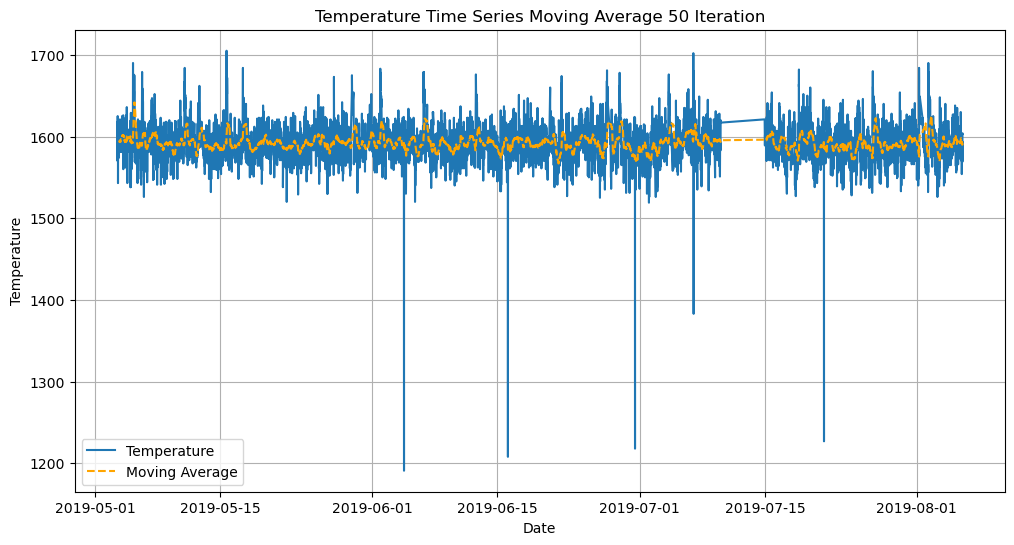

In [84]:
# menampilkan grafik moving average dengan ukuran jendela 50
new_temp = data_temp2.copy()
new_temp['mov_avg'] = new_temp['temperature'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(new_temp['measurement_time'], new_temp['temperature'], label='Temperature')
plt.plot(new_temp['measurement_time'], new_temp['mov_avg'], label='Moving Average', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series Moving Average 50 Iteration')
plt.legend()
plt.grid(True)
plt.show()

***
Based on the graph above, there is no visible trend in temperature measurement results over time series, although there are several points where the measurement results drop quite far from the average. For more details, we will show a sample graph of temperature measurement results over time for the iteration process at key `1` - `3`.

Text(0.5, 1.0, 'Temperature Key 1')

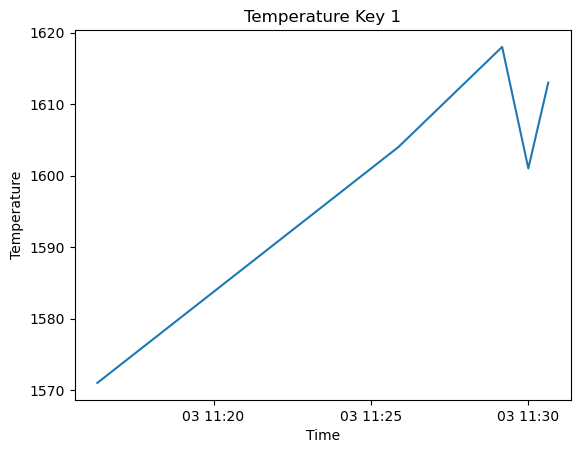

In [85]:
# menampilkan grafik hasil pengukuran temperature berjalannya waktu proses iterasi key 1
data_key_1 = data_temp2[data_temp2['key'] == 1]

plt.plot(data_key_1['measurement_time'], data_key_1['temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Key 1')

Text(0.5, 1.0, 'Temperature Key 2')

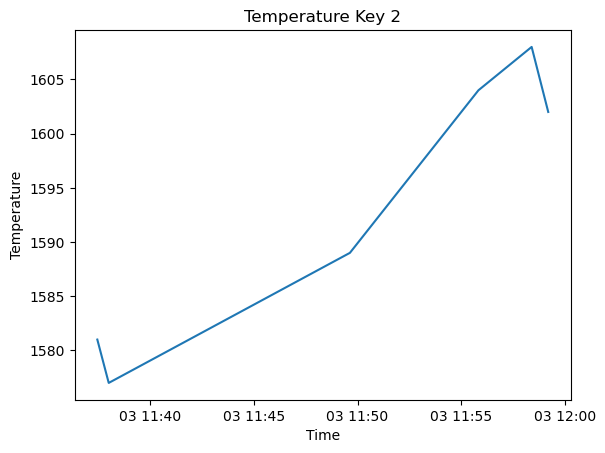

In [86]:
# menampilkan grafik hasil pengukuran temperature berjalannya waktu proses iterasi key 2
data_key_2 = data_temp2[data_temp2['key'] == 2]

plt.plot(data_key_2['measurement_time'], data_key_2['temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Key 2')

Text(0.5, 1.0, 'Temperature Key 3')

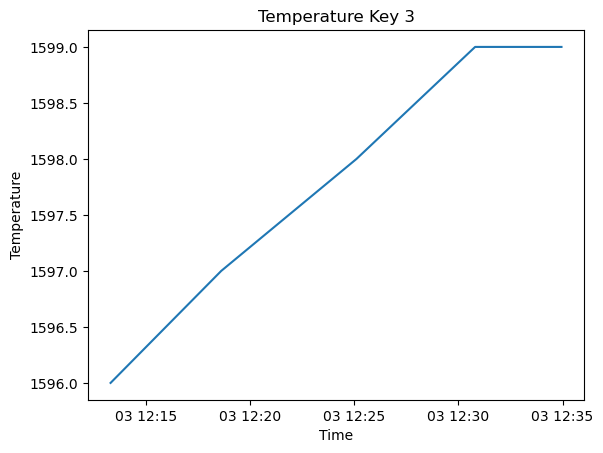

In [87]:
# menampilkan grafik hasil pengukuran temperature berjalannya waktu proses iterasi key 3
data_key_3 = data_temp2[data_temp2['key'] == 3]

plt.plot(data_key_3['measurement_time'], data_key_3['temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Key 3')

**Take Temperature Measurement Results at the beginning, middle and end of the Cycle**

In [88]:
# mengambil hasil pengukuran awal, tengah dan akhir tiap siklus
# melakukan grouping
data_temp2 = data_temp2.sort_values(by=['key', 'measurement_time'])

# melakukan grouping
new_data_temp = data_temp2.groupby('key').agg({'temperature' : ['first', 'median', 'last']})
new_data_temp.columns = ['first_temp', 'int_temp', 'last_temp']

# reset index
new_data_temp = new_data_temp.reset_index()
new_data_temp

,key,first_temp,int_temp,last_temp
0,1,1571.0,1604.0,1613.0
1,2,1581.0,1595.5,1602.0
2,3,1596.0,1598.0,1599.0
3,4,1601.0,1623.0,1625.0
4,5,1576.0,1589.0,1602.0
...,...,...,...,...
2472,2495,1570.0,1590.0,1591.0
2473,2496,1554.0,1583.5,1591.0
2474,2497,1571.0,1580.0,1589.0
2475,2498,1591.0,1591.0,1594.0


Text(0.5, 1.0, 'Data Distribution Temperature')

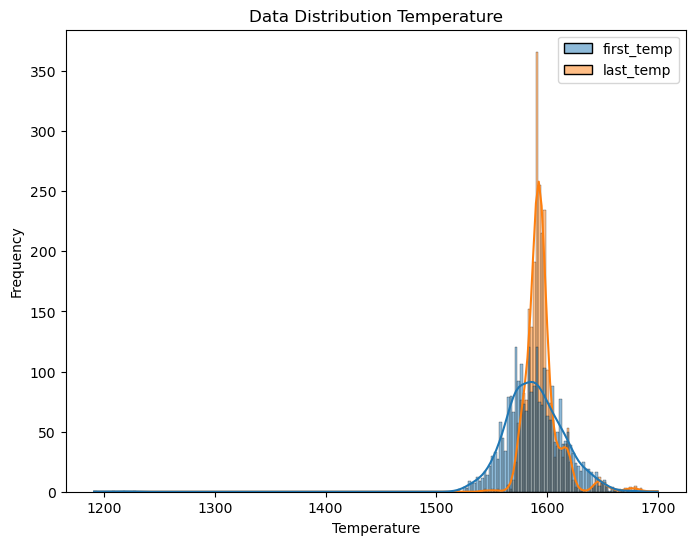

In [89]:
# menampilkan distribusi hasil pengukuran suku awal iterasi
plt.figure(figsize=(8, 6))
sns.histplot(new_data_temp[['first_temp', 'last_temp']], kde=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Data Distribution Temperature")

***
**Findings**

* Based on the moving average graph display, there is no visible trend of temperature measurement results over time series, but based on the graph of temperature measurement results vs iterations in key `1 -3`, it can be seen that there is an increase in temperature measurement results over time series (number of iterations). Therefore, it is difficult to predict temperature based on time series data.
* The previous findings are reinforced by the temperature distribution graph, where it is observed that the measured temperature at the end of the iteration or cycle has increased to the range of `1540 - 1700`. The density of the temperature measurement results is in the range of `1590`. The distribution graph also shows that there are peaks below `1500` and above `1650` for the initial temperature. We will check if there are outliers in the `first_temp` column.

Next, check for outliers in the `first_temp` column.

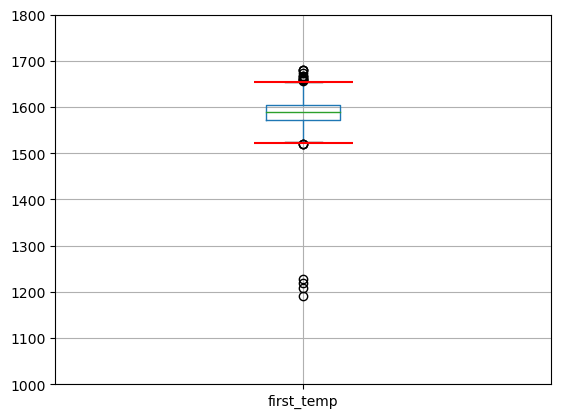

In [90]:
# menampilkan grafik boxplot dengan whisker teoritis bagian atas
Q1 = new_data_temp['first_temp'].quantile(0.25)
Q3 = new_data_temp['first_temp'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(1000, 1800)
new_data_temp.boxplot('first_temp')
plt.hlines(y=Q1 - 1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')

***
It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* of the displayed boxplot; the lower and upper theoretical whiskers will guide the *outlier* boundary in this column and will be removed from the train dataset.

### 3.6 data_wire

**Check Missing Value**

In [91]:
# mengisi nilai yang hilang dengan 0
data_wire = data_wire.fillna(0)

In [92]:
# menampilkan jumlah nilai yang hilang
data_wire.isna().sum()

key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

The missing values have been resolved. Next calculate the total bulk usage by adding the `total_wire` column.

In [93]:
# menghitung total penggunaan bulk tiap key
column_to_sum = list(range(1, 10))

data_wire['total_wire'] = 0

for column_index in column_to_sum:
    data_wire['total_wire'] += data_wire.iloc[:, column_index]

data_wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,total_wire
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796
...,...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.088959
3077,3238,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.128799
3078,3239,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.357761
3079,3240,34.070400,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.070400


Text(0.5, 1.0, 'Data Distribution Wire Consumption')

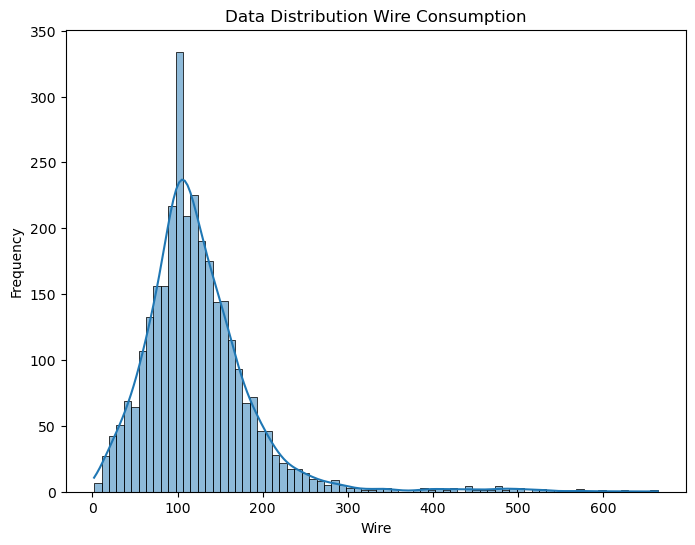

In [94]:
# menampilkan distribusi bulk consumption
plt.figure(figsize=(8, 6))
sns.histplot(data_wire['total_wire'], kde=True)
plt.xlabel("Wire")
plt.ylabel("Frequency")
plt.title("Data Distribution Wire Consumption")

***
Based on the distribution chart above, it is known that the typical wire feeder consumes as much as `100 wires' to obtain the required chemical composition.

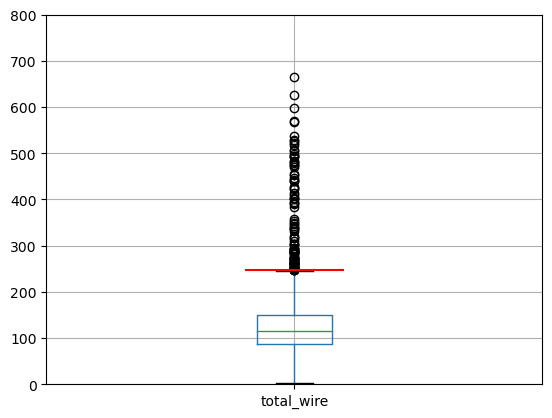

In [95]:
# menampilkan grafik boxplot dengan whisker teoritis bagian atas
Q1 = data_wire['total_wire'].quantile(0.25)
Q3 = data_wire['total_wire'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 800)
data_wire.boxplot('total_wire')
plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* of the displayed boxplot; the upper theoretical whisker will guide the *outlier* boundary in this column and will be removed from the train dataset.

In [96]:
# membuat variabel new_data_wire
new_data_wire = data_wire[['key', 'total_wire']]
new_data_wire.describe()

,key,total_wire
count,3081.000000,3081.000000
mean,1623.426485,123.723326
std,932.996726,66.082966
min,1.000000,1.918800
25%,823.000000,86.112000
50%,1619.000000,114.179523
75%,2434.000000,150.181198
max,3241.000000,663.851766


Based on the descriptive statistics of the data, it is known that the range of minimum and maximum values of `total_wire` is quite far, namely from the range of `1.9188 - 663.851766`, therefore binning will be done to create category features.

In [97]:
# melakukan binning berdasarkan pendekatan kuartil
bins = [0, 85, 115, 150, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High'] 

# membuat fitur baru 'total_bulk_category'
new_data_wire.loc[:, 'total_wire_category'] = pd.cut(new_data_wire['total_wire'], bins=bins, labels=labels, include_lowest=True)
new_data_wire

C:\Users\KOMPUTER\AppData\Local\Temp\ipykernel_10464\2058672205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_wire.loc[:, 'total_wire_category'] = pd.cut(new_data_wire['total_wire'], bins=bins, labels=labels, include_lowest=True)


,key,total_wire,total_wire_category
0,1,60.059998,Low
1,2,96.052315,Medium
2,3,91.160157,Medium
3,4,89.063515,Medium
4,5,98.352796,Medium
...,...,...,...
3076,3237,38.088959,Low
3077,3238,56.128799,Low
3078,3239,143.357761,High
3079,3240,34.070400,Low


### 3.7 data_wire_time

**Change `wire` column to `datetime`.**

In [98]:
# mengubah tipe data menjadi datetime
columns_to_convert = list(range(1, 10))

data_wire_time.iloc[:, columns_to_convert] = data_wire_time.iloc[:, columns_to_convert].apply(pd.to_datetime)

data_wire_time

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3077,3238,2019-08-31 23:38:24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3078,3239,2019-09-01 01:50:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3079,3240,2019-09-01 03:12:02,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


C:\Users\KOMPUTER\AppData\Local\Temp\ipykernel_10464\611556960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['duration'] = sample_data.iloc[:, 1:].max(axis=1) - sample_data.iloc[:, 1:].min(axis=1)


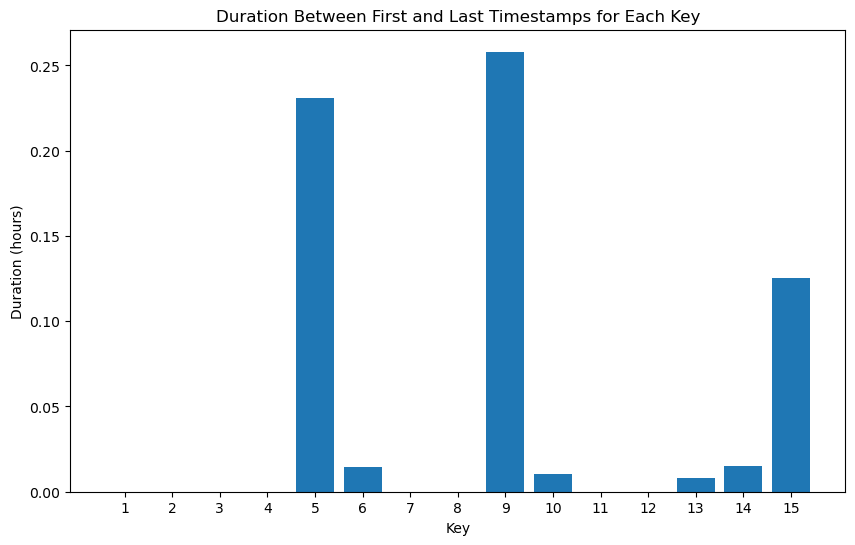

In [99]:
# mengambil sampel data 15 key
sample_data = data_wire_time[data_wire_time['key'] <= 15]

# menghitung durasi setiap key
sample_data['duration'] = sample_data.iloc[:, 1:].max(axis=1) - sample_data.iloc[:, 1:].min(axis=1)

# menampilkan grafik time series
plt.figure(figsize=(10, 6))
plt.bar(sample_data['key'], sample_data['duration'].dt.total_seconds() / 3600) 
plt.xlabel('Key')
plt.ylabel('Duration (hours)')
plt.title('Duration Between First and Last Timestamps for Each Key')
plt.xticks(sample_data['key'])
plt.show()

***
Based on the sample data and graph above, the same thing also happens in the `data_wire_time` dataset, where it can be seen that the duration of wire usage is different for each key or bet, where for the first 15 keys, key`9` requires the longest inter-wire usage time of `0.25 hours`, but it is unique in some keys where there is no peak at all. From this finding, we can see that each key requires a different duration of bulk usage time (there is no visible trend in the graph), and the absence of peaks in some keys indicates that the batch only uses one type of bulk.

## 4. Data Pre-Processing<a id="section-4"></a>

Complete and merge the initial features and engineering features that can potentially affect steel temperature by using the key column as a reference for *merging* datasets and the **.merge()** method. The data sets to be merged are:
1. `new_data_arc`
2. `new_data_bulk`
3. `data_gas`
4. `new_data_temp`
5. `new_data_wire`

In [104]:
# menggabungkan dataset
data_merge = new_data_temp.merge(new_data_bulk, on='key', how='inner').merge(data_gas, on='key', how='inner').merge(
    new_data_wire, on='key', how='inner').merge(new_data_arc, on='key', how='inner')
data_merge

,key,first_temp,int_temp,last_temp,total_bulk,total_bulk_category,gas_1,total_wire,total_wire_category,active_power,reactive_power,duration_hours,energy_consumption,power_ratio,iteration_count
0,1,1571.0,1604.0,1613.0,553.0,Medium,29.749986,60.059998,Low,4.878147,3.183241,0.304,0.334306,7.694490,5
1,2,1581.0,1595.5,1602.0,582.0,Medium,12.555561,96.052315,Medium,3.052598,1.998112,0.225,0.203682,6.207336,4
2,3,1596.0,1598.0,1599.0,544.0,Medium,28.554793,91.160157,Medium,2.525882,1.599076,0.181,0.122989,7.915599,5
3,4,1601.0,1623.0,1625.0,595.0,Medium,18.841219,89.063515,Medium,3.209250,2.060298,0.207,0.186942,6.253946,4
4,5,1576.0,1589.0,1602.0,584.0,Medium,5.413692,98.352796,Medium,3.347173,2.252643,0.242,0.277139,5.921711,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,1570.0,1590.0,1591.0,719.0,High,7.125735,89.150879,Medium,3.210690,2.360777,0.202,0.174730,5.490937,4
2325,2496,1554.0,1583.5,1591.0,796.0,High,9.412616,114.179527,Medium,4.203064,2.810185,0.260,0.201360,8.946351,6
2326,2497,1571.0,1580.0,1589.0,665.0,High,6.271699,103.134723,Medium,2.212379,1.851269,0.158,0.118806,3.576108,3
2327,2498,1591.0,1591.0,1594.0,733.0,High,14.953657,118.110717,High,3.408725,2.355428,0.208,0.175002,7.350361,5


In [105]:
# mengecek nilai yang hilang pada dataset gabungan
data_merge.isna().sum()

key                    0
first_temp             0
int_temp               0
last_temp              0
total_bulk             0
total_bulk_category    0
gas_1                  0
total_wire             0
total_wire_category    0
active_power           0
reactive_power         0
duration_hours         0
energy_consumption     0
power_ratio            0
iteration_count        0
dtype: int64

### 4.1 Correlation between Feature and Target

<AxesSubplot:>

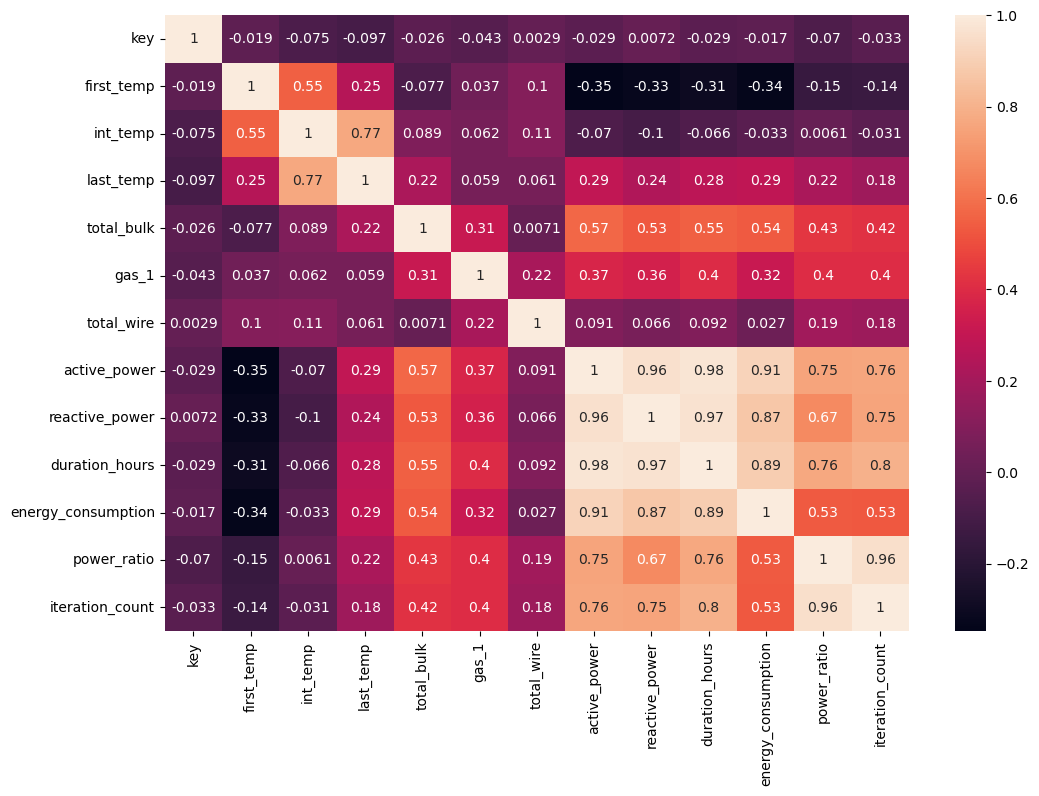

In [106]:
# menampilkan korelasi antar fitur dan target
plt.figure(figsize = (12, 8))
sns.heatmap(data_merge.corr(), annot=True)

***
Based on the correlation infographic above, it can be seen that the features that have a fairly low correlation score with the target / `last_temp` are the features `gas_1` and `total_wire`. For correlation between features, the features `active_power`, `reactive_power` have a very high correlation score (multicollinearity), while the key column is a unique column, so the `key` and `reactive_power` columns will be dropped from the dataset.

In [107]:
# menyeleksi fitur
good_data = data_merge.drop(['key', 'reactive_power'], axis=1)
good_data.head()

,first_temp,int_temp,last_temp,total_bulk,total_bulk_category,gas_1,total_wire,total_wire_category,active_power,duration_hours,energy_consumption,power_ratio,iteration_count
0,1571.0,1604.0,1613.0,553.0,Medium,29.749986,60.059998,Low,4.878147,0.304,0.334306,7.694490,5
1,1581.0,1595.5,1602.0,582.0,Medium,12.555561,96.052315,Medium,3.052598,0.225,0.203682,6.207336,4
2,1596.0,1598.0,1599.0,544.0,Medium,28.554793,91.160157,Medium,2.525882,0.181,0.122989,7.915599,5
3,1601.0,1623.0,1625.0,595.0,Medium,18.841219,89.063515,Medium,3.209250,0.207,0.186942,6.253946,4
4,1576.0,1589.0,1602.0,584.0,Medium,5.413692,98.352796,Medium,3.347173,0.242,0.277139,5.921711,4


### 4.2 Categorical Feature Labeling

The next step is labeling the categorical features `total_bulk_category` and `total_wire_category`.

In [108]:
# import funsi ordinal encoder dari model sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# melakukan ordinal encoder
categoric = ['total_bulk_category', 'total_wire_category']
good_data[categoric] = OrdinalEncoder().fit_transform(good_data[categoric])
good_data

,first_temp,int_temp,last_temp,total_bulk,total_bulk_category,gas_1,total_wire,total_wire_category,active_power,duration_hours,energy_consumption,power_ratio,iteration_count
0,1571.0,1604.0,1613.0,553.0,2.0,29.749986,60.059998,1.0,4.878147,0.304,0.334306,7.694490,5
1,1581.0,1595.5,1602.0,582.0,2.0,12.555561,96.052315,2.0,3.052598,0.225,0.203682,6.207336,4
2,1596.0,1598.0,1599.0,544.0,2.0,28.554793,91.160157,2.0,2.525882,0.181,0.122989,7.915599,5
3,1601.0,1623.0,1625.0,595.0,2.0,18.841219,89.063515,2.0,3.209250,0.207,0.186942,6.253946,4
4,1576.0,1589.0,1602.0,584.0,2.0,5.413692,98.352796,2.0,3.347173,0.242,0.277139,5.921711,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,1570.0,1590.0,1591.0,719.0,0.0,7.125735,89.150879,2.0,3.210690,0.202,0.174730,5.490937,4
2325,1554.0,1583.5,1591.0,796.0,0.0,9.412616,114.179527,2.0,4.203064,0.260,0.201360,8.946351,6
2326,1571.0,1580.0,1589.0,665.0,0.0,6.271699,103.134723,2.0,2.212379,0.158,0.118806,3.576108,3
2327,1591.0,1591.0,1594.0,733.0,0.0,14.953657,118.110717,0.0,3.408725,0.208,0.175002,7.350361,5


### 4.3 Prepare Training set and Test set

*Splitting data* on the `good_data` dataset is done with the **TrainSplitTest** function from the sklearn.preprocessing module, where the training and test data proportions are as follows:
1. Training set - **80%**
2. Test set - **20%**

In [152]:
# mengimport fungsi trainsplittest
from sklearn.model_selection import train_test_split


training, test= train_test_split(good_data, test_size=0.20, random_state=123)

# menampilkan ukuran dataset baru
print(training.shape)
print(test.shape)

(1863, 13)
(466, 13)


### 4.4 Handling Outlier

Based on preliminary findings, it is known that there are outliers in some columns of the `training` dataset. These outliers will be cleaned to improve the model training performance.

In [153]:
'''
akan dibuat sebuah fungsi yang terdiri dari tahapan :
1. memperoleh rentang interquartile (IQR)
2. menghitung batas bawah dan batas atas
3. melakukan iterasi pada kolom spesifik dan melakukan pemberishan outlier berdasarkan nilai IQR
'''

from collections import defaultdict
def remove_outlier(df_in, col_names):
    fence_map = defaultdict(list)
    for name in col_names:
        q1 = df_in[name].quantile(0.25)
        q3 = df_in[name].quantile(0.75)
        iqr = q3-q1 
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        fence_map[name] = (fence_low, fence_high)
    df_out = df_in
    for k, v in fence_map.items():
        df_out = df_out.loc[(df_out[k] > v[0]) & (df_out[k] < v[1])]

    return df_out

parameters = ['first_temp', 'active_power', 'total_bulk', 'gas_1', 'total_wire',
              'duration_hours', 'energy_consumption'] 

print(training.shape)

training_fix = remove_outlier(training, parameters)

print(training_fix.shape)

(1863, 13)
(1640, 13)


Outliers in the training dataset have been successfully removed.

### 4.5 Prepare Feature and Target

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# menyiapkan fitur dan target dataset training dan test
x_train = training_fix.drop(['last_temp'], axis=1)
x_test = test.drop(['last_temp'], axis=1)
y_train = training_fix['last_temp']
y_test = test['last_temp']

# Standardize dataset training and test
scaler = StandardScaler()
numeric = ['first_temp', 'int_temp', 'active_power', 'total_bulk', 'gas_1', 'total_wire',
           'duration_hours', 'energy_consumption', 'power_ratio', 'iteration_count']
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

print(x_train_std)
print(x_test_std)

[[ 0.38209316  0.5499769  -0.07042488 ...  0.12239023  0.30280561
   0.3375849 ]
 [ 0.82869909  2.16700655 -0.4560941  ...  0.5486353   1.17449753
   1.7234153 ]
 [-0.73442167 -1.57769369  0.08903451 ...  0.09249761 -1.02718662
  -1.04824549]
 ...
 [ 1.76657154  0.63508372  0.50807895 ... -1.19297483 -1.03835441
  -1.04824549]
 [-0.77908226  0.03933596  1.33504276 ...  0.56519843 -1.0800609
  -1.04824549]
 [-0.19849455 -0.55641181 -0.33371829 ...  0.03512182 -0.8192705
  -1.04824549]]
[[ 1.36462621  1.31593831 -1.89493697 ... -1.50112614 -1.02269938
  -1.04824549]
 [-0.60043989 -0.68407204  0.55257925 ...  0.98585545  0.16450012
   0.3375849 ]
 [-0.95772463 -0.38619816 -1.51297611 ... -0.89011264 -0.31400984
  -0.35533029]
 ...
 [-1.35966997 -0.21598451 -0.22988427 ...  1.55865096 -0.31652062
  -0.35533029]
 [-0.10917336 -0.08832428  2.04704748 ...  0.36354644  1.42332079
   1.7234153 ]
 [ 1.63258976  0.29465643 -1.68726893 ... -1.34130314 -0.59358189
  -0.35533029]]


## 5. Model Training<a id="section-5"></a>

The models that will be chosen to predict the last temperature are:
1. Linear Regression
2. Random Forest Regressor
3. KNearest Regressor
4. XGBoost Regressor
5. LightGBM Regressor

In [123]:
# menyiapkan fungsi mae
from sklearn.metrics import make_scorer, mean_absolute_error
mae = mean_absolute_error

# mengimport GridSearchCV, Kfold, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

### 5.1 Linear Regression(LR)

In [114]:
# mengimport model random forest regressor
from sklearn.linear_model import LinearRegression

In [155]:
%%time

# melakukan pelatihan model
lr = LinearRegression()
lr.fit(x_train_std, y_train)

# prediksi model
predict_train = lr.predict(x_train_std)
predict_test = lr.predict(x_test_std)

# menampilkan metriks evaluasi mae
print('MAE LR dataset train : ', round(mae(y_train, predict_train), 1))
print('MAE LR dataset test : ', round(mae(y_test, predict_test), 1))

MAE LR dataset train :  3.8
MAE LR dataset test :  3.9
Wall time: 3 ms


Based on the above results, the MAE obtained on the test dataset is very good, where the MAE score of the train dataset is `3.8` and the test dataset is `3.9` with a running time of `45.4 ms`.

### 5.2 Random Forest Regressor (RF)

In [117]:
# mengimport random forest regressor dari modul sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [130]:
%%time
# optimasi hyperparameter model Random Forest Regressor
n_folds = 5 

# membuat K-Folds cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# menentukan tuning hyperparameter
rf_grid = {
    'max_depth': [None, 6, 8, 10],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 30],
}

# instance 
model = RandomForestRegressor(random_state = 42)
grid_search_rf = GridSearchCV(estimator=model, param_grid=rf_grid, cv=kf,
                              scoring='neg_mean_absolute_error', n_jobs=-1)

# menjalankan grid search
grid_search_rf.fit(x_train_std, y_train)

# menampilkan best parameter 
best_params = grid_search_rf.best_params_
print('Parameter terbaik : {}'.format(best_params))

Parameter terbaik : {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Wall time: 47.5 s


Based on the hyperparameter tuning results, the best parameters will be used for training the Random Forest model.

In [156]:
%%time
# pelatihan model random forest dengan hyperparameter baru
rf = RandomForestRegressor(max_depth = None, min_samples_leaf = 5 ,min_samples_split = 2,
                           n_estimators = 200, random_state=42)
rf.fit(x_train_std, y_train)

predict_train = rf.predict(x_train_std)
predict_test = rf.predict(x_test_std)

# menampilkan metriks evaluasi mae
print('MAE RF dataset train : ', round(mae(y_train, predict_train), 1))
print('MAE RF dataset test : ', round(mae(y_test, predict_test), 1))

MAE RF dataset train :  2.4
MAE RF dataset test :  3.6
Wall time: 1.04 s


Based on the above results, the MAE obtained on the test dataset is good; where the MAE score of the train dataset is `2.4` and the test dataset is `3.6` with a running time of `1.04 s`, the difference in MAE scores of the train and test datasets is quite significant, and there is potential for this model to experience overfitting.

### 5.3 KNeighbor Regressor (KNN)

In [133]:
# mengimport knn regressor dari modul sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

In [134]:
%%time
# optimasi hyperparameter model KNeighbors Regressor

# menentukan tuning hyperparameter
knn_grid = {'n_neighbors' : range(1,5,1),
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           }

# instance 
knn = KNeighborsRegressor()

# Grid search 
grid_search_knn = GridSearchCV(
    estimator   = knn,
    param_grid  = knn_grid,
    scoring     = "neg_mean_absolute_error",
    cv          = kf, 
    n_jobs      = 1
)

# menjalankan grid search
grid_search_knn.fit(x_train_std, y_train)

# hasil 
print('Parameter terbaik: {}'.format(grid_search_knn.best_params_))

Parameter terbaik: {'algorithm': 'auto', 'n_neighbors': 4}
Wall time: 427 ms


The best parameters will be used for model training.

In [157]:
%%time
# pelatihan model knn dengan hyperparameter baru
knn = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 4)
knn.fit(x_train_std, y_train)

# prediksi model
predict_train = knn.predict(x_train_std)
predict_test = knn.predict(x_test_std)

# menampilkan metriks evaluasi mae
print('MAE KNN dataset train : ', round(mae(y_train, predict_train), 1))
print('MAE KNN dataset test : ', round(mae(y_test, predict_test), 1))

MAE KNN dataset train :  3.9
MAE KNN dataset test :  4.8
Wall time: 32.3 ms


Based on the above results, the MAE obtained on the test dataset is good; where the MAE score of the train dataset is `3.9` and the test dataset is `4.8` with a running time of `32.3 ms`, it is likely that this model also experiences overfitting.

### 5.4 XGBoost Regressor (XGB)

In [136]:
# mengimport model xgboost
from xgboost import XGBRegressor

# optimasi hyperparameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
}

In [137]:
%%time

# membuat instance
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# tunning hyperparameter
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=kf)
grid_search.fit(x_train_std, y_train)

Wall time: 1min 43s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_s

In [138]:
# menampilkan tunning hyperparameter terbaik
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}

The tuned parameters above will be used for training the XGBoost model.

In [158]:
%%time

# melatih model xgboost
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05, subsample=0.9)
xgb.fit(x_train, y_train)

# prediksi model
predict_train = xgb.predict(x_train)
predict_test = xgb.predict(x_test)

# menampilkan metriks evaluasi mae
print('MAE XGB dataset train : ', round(mae(y_train, predict_train), 1))
print('MAE XGB dataset test : ', round(mae(y_test, predict_test), 1))

MAE XGB dataset train :  2.5
MAE XGB dataset test :  3.6
Wall time: 76.1 ms


Based on the above results, the MAE obtained on the dataset is very good; where the MAE score of the train dataset is `2.5` and the test dataset is `3.6` with a running time of `56.7 ms`, this model is also likely to experience overfitting.

### 5.5 LightGBM Regressor (LGB)

In [162]:
# import gradient boosting lightgbm regressor
import lightgbm as lgb

In [163]:
%%time
# optimasi hyperparameter model adaboost regressor

# menentukan tuning hyper parameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 2, 3],
}

# membuat instance model
lgb_model = lgb.LGBMRegressor()

# membuat GridSearchCV 
grid_search = GridSearchCV(lgb_model, param_grid, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 12
[LightGBM] [Info] Start training from score 1592.456098
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300}
Wall time: 27.5 s


The tunned parameters above will be used for training the LightGBM model.

In [135]:
%%time

# melatih model adaboost
lgb = lgb.LGBMRegressor(**best_params)
lgb.fit(x_train, y_train)

# prediksi model
predict_train = lgb.predict(x_train)
predict_test = lgb.predict(x_test)

# menampilkan metriks evaluasi mae
print('MAE CB dataset train : ', round(mae(y_train, predict_train), 1))
print('MAE CB dataset test : ', round(mae(y_test, predict_test), 1))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 12
[LightGBM] [Info] Start training from score 1592.714720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

Based on the above results, the MAE obtained on the test dataset is good, where the MAE score of the train dataset is `2.5` and the test dataset is `3.8` with a running time of `32.6 ms`. The difference in MAE scores of the train and test datasets is quite significant, and there is potential for this model to experience overfitting.

## 6. Model Analysis<a id="section-6"></a>

In [164]:
# menampilkan hasil pelatihan dan evaluasi model
hasil_pelatihan = {"Model" : ["Linear Regression", "Random Forest Regressor", "KNeighbors Regressor", "XGBoost Regressor", "LightGBM Regressor"],
                   "Hyperparamater Tune Time" : ['0', '47.5 s', '427 ms', '1 min 43 s','27.5 s'],
                   "Training-Prediction Time" : ['3 ms','1.04 s','32.3 ms','76.1 ms','32.6 ms'],
                   "MAE Train" : ['3.8', '2.4','3.9','2.5','2.5'],
                  " MAE Test" : ['3.9', '3.6', '4.8', '3.6', '3.8']}
pd.DataFrame(hasil_pelatihan)

,Model,Hyperparamater Tune Time,Training-Prediction Time,MAE Train,MAE Test
0,Linear Regression,0,3 ms,3.8,3.9
1,Random Forest Regressor,47.5 s,1.04 s,2.4,3.6
2,KNeighbors Regressor,427 ms,32.3 ms,3.9,4.8
3,XGBoost Regressor,1 min 43 s,76.1 ms,2.5,3.6
4,LightGBM Regressor,27.5 s,32.6 ms,2.5,3.8


***
From the training results above, based on the running time of hyperparameter tuning, the `KNeighbors` model has the fastest time compared to other models for `427 ms` but the MAE score obtained on the test dataset is the largest among other models at `4.8`, while the `Linear Regression` model is without tunning. The training and prediction running time of the `Linear Regression` model is the fastest at `2.51 ms` with a low MAE score on the test dataset of `3.8`. The lowest MAE scores were obtained from the Random Forest Regressor and XGBoost Regressor models, but it is likely that these two models experienced overfitting. Based on these results, the model that is able to predict the optimum temperature (last_temperature) accurately with a short running time and does not experience overfitting is the **Linear Regression** model, where the MAE score on the train data is **3.8** and on the test data **3.9** with a running time training-prediction **3 ms**.

## 7. General Conclusion<a id="section-7"></a>

### 7.1 Exploratory Data
***
Based on preliminary data findings, information was obtained, including:
1. There is a column name that is not appropriate, so the column name is replaced with an English term.

2. There are missing values in several columns, including:
- data_bulk: missing values in some columns may occur due to specific bulk usage, so new data is created in the form of total bulk usage in the `total_bulk` column.
- data_bulk_time: the missing values are similar to the `data_bulk` dataset, but because this dataset is not the main parameter, it is not used as a feature.
- data_temp: missing values in the `temperature` column are likely due to temperature measurement errors, and almost all of them occur after the 2nd and subsequent iterations. Missing values occurred from key `2400 - 3241` so this key was dropped from the dataset.
- data_wire : missing values in some columns in this dataset are similar to `data_bulk` so new data was created in the form of total wire feeder usage in the `total_wire` column.
- data_wire_time : the missing values are similar to those in the `data_wire` dataset, but because this dataset is not the main parameter, it is not used as a feature.

3. Based on the results of dataset exploration, the following information is known:
- The duration of chamber heating is generally `0.25 hours` for the total number of iterations or cycles of each key.
- Generally, the energy spent for the heating process of 1 key is `0.25` and it is also seen that there is considerable energy consumption above `1`. This can be reduced by reducing the heating time or the number of process iterations.
- The usage consumption of bulk mix for a batch is generally around `700` volume, and wire feeder is around `100 wire`.
- The number of iterations or cycles required to achieve the required chemical composition at optimum temperature is generally 4 iterations or cycles.
- The optimum temperature reached where the chemical composition of the steel is met is generally at `1590 degrees`.
- The target or label to be predicted is the measured temperature at the end of the iteration, where this information is contained in the dataset `new_data_temp` column `last_temp`.
- There are quite a number of outliers in the `data_arc`, `data_bulk`, `data_gas`, `data_temp` and `data_wire` datasets, so outlier cleaning is performed before the datasets are used for model development.

4. At this stage, feature engineering is also carried out to enrich data information and improve model quality.

### 7.2 Model Training and Evaluation
***
* The dataset prepared for model training is obtained by merging the datasets:
1. `new_data_arc`
2. `new_data_bulk`
3. `data_gas`
4. `new_data_temp`
5. `new_data_wire`

with reference to the `key` column. This new dataset consists of `2329` observations with `13` features and 1 label, which is the optimum temperature (`last_temperature`). After checking the correlation between features, it was found that the features `active_power` and `reactive_power` had a very high correlation, so the feature `reactive_power` was dropped from the dataset and the column `key` was dropped from the main dataset.

* There are 5 models developed by *tuning hyperparameters*. A Linear Regression model is obtained that is able to accurately and not experiencing *overfitting* predict the optimum temperature of steel where the MAE / error score is `3.9` degrees on the test dataset. Although the project description is not clear enough to describe how the temperature relationship can reduce production costs, based on data exploration, energy savings can be made by reducing the number of key iteration processes, which are also indirectly related to the optimum temperature measurement results.

## References
1. Von Meier, A. (2006). Electric Power Systems: A Conceptual Introduction. Wiley.<a id="section-8"></a>
2. [Energy and Power Consumption Calculator – kWh Calculator](https://www.electricaltechnology.org/2020/12/energy-power-consumption-kwh-calculator.html): online resources lainnya untuk menambah informasi.<a id="section-9"></a>